In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Tweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [4]:
data.shape

(14640, 15)

In [5]:
sentiment_counts = data.airline_sentiment.value_counts()

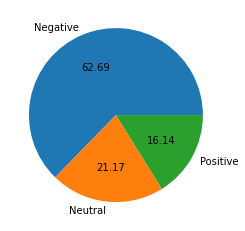

In [6]:
plt.pie(sentiment_counts,labels=['Negative','Neutral','Positive'],autopct='%0.2f')
plt.show()

In [7]:
new_data = data.copy()
new_data = new_data[new_data['airline_sentiment_confidence'] > 0.65]
new_data['sentiment'] = new_data['airline_sentiment'].apply(lambda x: 1 if x=='negative' else 0)

In [8]:
new_data.shape

(13651, 16)

In [9]:
new_data = new_data.loc[:, ['text', 'sentiment']]
new_data.head()

,text,sentiment
0,@VirginAmerica What @dhepburn said.,0
2,@VirginAmerica I didn't today... Must mean I n...,0
3,@VirginAmerica it's really aggressive to blast...,1
4,@VirginAmerica and it's a really big bad thing...,1
5,@VirginAmerica seriously would pay $30 a fligh...,1


In [10]:
import nltk

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
from nltk.stem import SnowballStemmer                               #better then porter steemer
sn=SnowballStemmer('english', ignore_stopwords=False)

In [13]:
def preprocessing(texter):
    
    texter=nltk.word_tokenize(texter)
    
    y=[]
    
    for i in texter:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
            
    texter=y[:]
    y.clear()
    
    for i in texter:
        y.append(sn.stem(i))
    return " ".join(y)

In [14]:
new_data["text"]=new_data["text"].apply(preprocessing)

In [15]:
new_data.head()

,text,sentiment
0,virginamerica what dhepburn said,0
2,virginamerica i n't today ... must mean i need...,0
3,virginamerica 's realli aggress blast obnoxi `...,1
4,virginamerica 's realli big bad thing,1
5,virginamerica serious would pay 30 flight seat...,1


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc , roc_auc_score
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score

from sklearn.pipeline import make_pipeline

In [17]:
tfid=TfidfVectorizer(analyzer='word',ngram_range=(1, 1))

In [18]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [19]:
pipeline_svm = make_pipeline(
                            tfid, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

In [20]:
grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

In [21]:
x=new_data["text"]
y=new_data["sentiment"]

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.33, random_state=40)


In [23]:
print(x_train.shape,x_test.shape)

(9146,) (4505,)


In [24]:
grid_svm.fit(x_train, y_train)
grid_svm.score(x_test, y_test)
grid_svm.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.6min finished


0.9095849606686605

In [25]:
def result(model, x_train,x_test,y_train,y_test):
    pred_proba = model.predict_proba(x_test)[:, 1]
    pred = model.predict(x_test)        

    auc = roc_auc_score(y_test, pred_proba)
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    result = {'auc': auc*100, 'f1': f1*100, 'acc': acc*100, 'precision': prec*100
              , 'recall': rec*100}
    return result

In [26]:
result(grid_svm.best_estimator_,  x_train,x_test,y_train,y_test)

{'auc': 91.14260265531829,
 'f1': 86.84672044896527,
 'acc': 83.35183129855716,
 'precision': 89.22522522522523,
 'recall': 84.59173214895797}

In [27]:
grid_svm.predict(["flying with @united is always a great experience"])

array([0], dtype=int64)

In [28]:
grid_svm.predict(["@united very bad experience!"])

array([1], dtype=int64)

In [31]:
import pickle
tfidf=pickle.dump(tfid,open('vector.pkl','wb'))
kfold=pickle.dump(kfolds,open('folds.pkl','wb'))
model=pickle.dump(grid_svm,open('model.pkl','wb'))